In [380]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [123]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [124]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [125]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [127]:
df.shape

(891, 12)

In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [130]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S


In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling the Null values:

In [132]:
# Dropping  the “Cabin” column from the data frame as it won’t be of much importance

df = df.drop(columns='Cabin', axis=1)


In [133]:

#Replacing the missing values in the “Age” column with the mean value

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [134]:
# Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

print(df['Embarked'].mode())

0    S
dtype: object


In [135]:
# Replacing the missing values in the “Embarked” column with mode value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [136]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Transformation into a categorical column.

In [137]:
# Let’s convert that into integer type values, and transform it into a categorical column:

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [138]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [139]:
# there are few columns, which are not of much importance in this process. Let us get rid of them

df= df.drop(columns = ['PassengerId','Name','Ticket',],axis=1)

In [140]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# EDA process

# Scatter plot:

In [141]:
# sns.scatterplot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

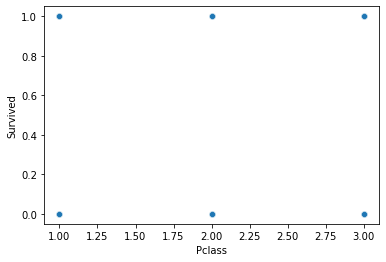

In [143]:
sns.scatterplot(x='Pclass',y='Survived',data=df)

we can see that Pclass is equally distribution in the range 1 to 3

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

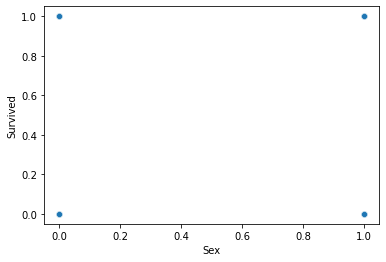

In [144]:
sns.scatterplot(x='Sex',y='Survived',data=df)

we can see that Sex is equally distribution in the range 0 to 1

<AxesSubplot:xlabel='Age', ylabel='Survived'>

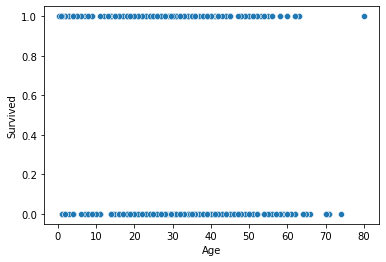

In [146]:
sns.scatterplot(x='Age',y='Survived',data=df)

we can see that Age is equally distribution in the range 0 to 70

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

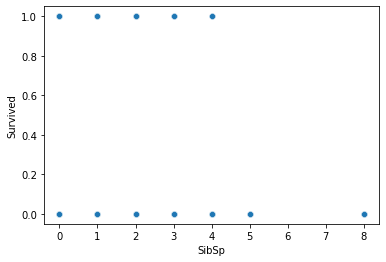

In [147]:
sns.scatterplot(x='SibSp',y='Survived',data=df)

we can see that SibSp is equally distribution in the range 0 to 5

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

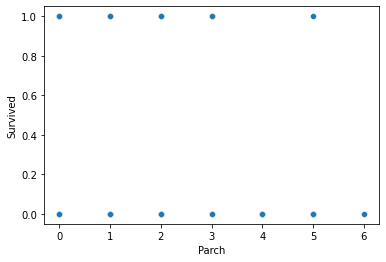

In [148]:
sns.scatterplot(x='Parch',y='Survived',data=df)

we can see that Parch is equally distribution in the range 0 to 5

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

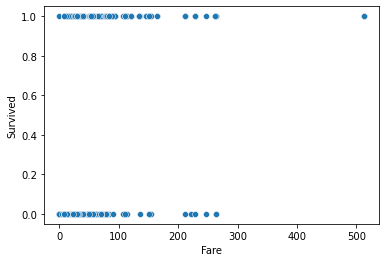

In [149]:
sns.scatterplot(x='Fare',y='Survived',data=df)

we can see that Fare is equally distribution in the range 0 to 250

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

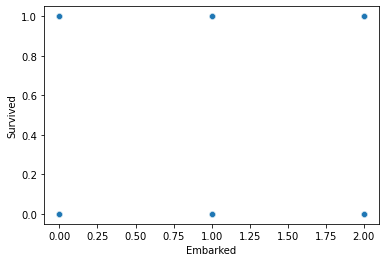

In [150]:
sns.scatterplot(x='Embarked',y='Survived',data=df)

we can see that Embarked is equally distribution in the range 0 to 2

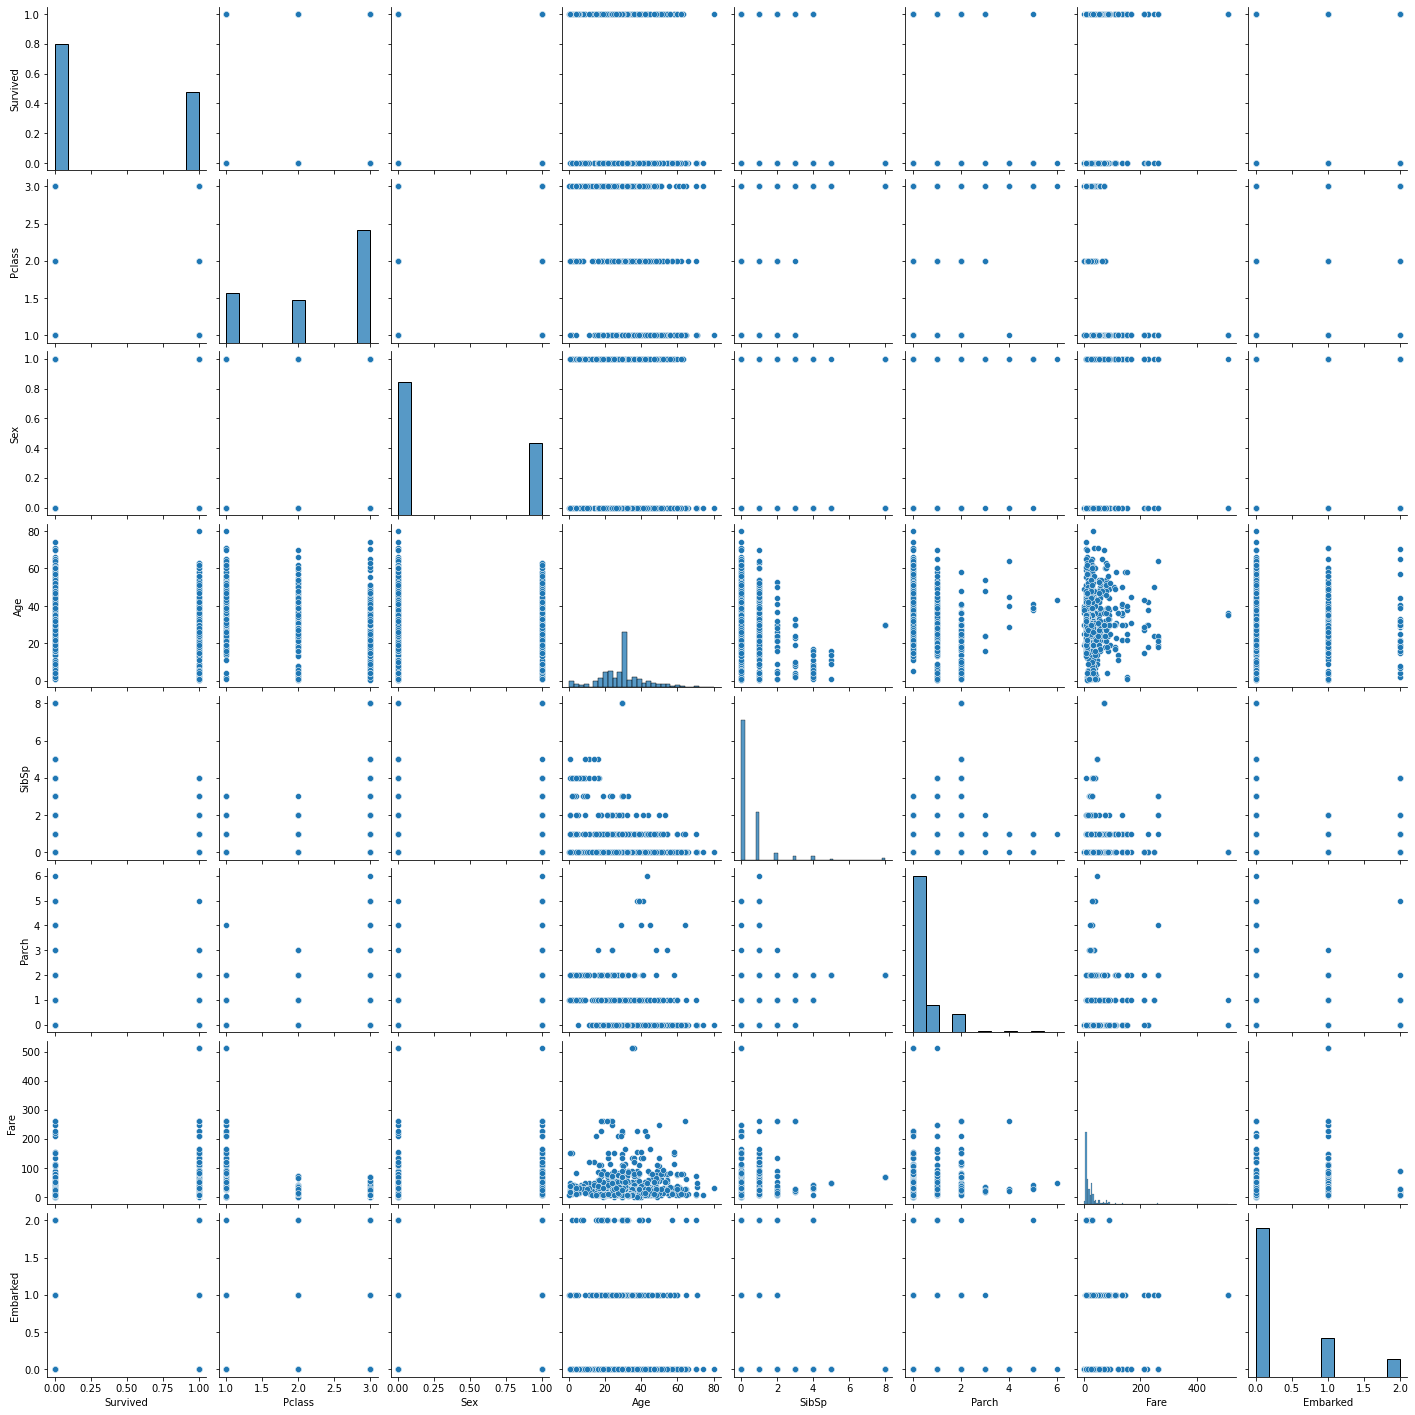

In [151]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

# Correlation:

In [154]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


In [155]:
df.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

Correlation using heatmap

<AxesSubplot:>

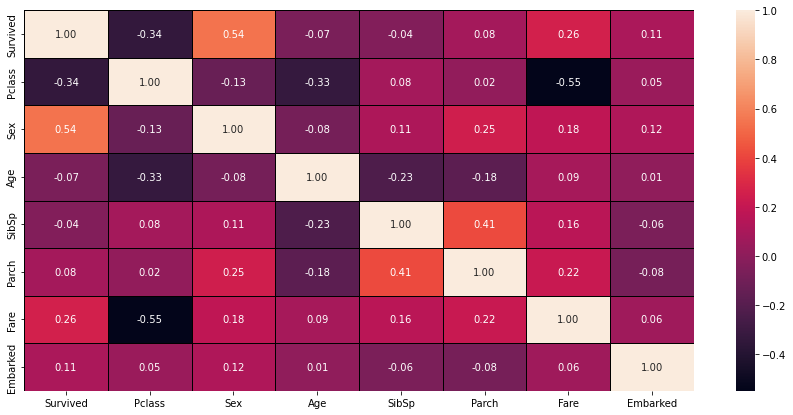

In [156]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

# Descriptive statistics

# Describing datasets :

In [157]:
round(df.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Sex,891.0,0.35,0.48,0.00,0.00,0.00,1.0,1.00
Age,891.0,29.70,13.00,0.42,22.00,29.70,35.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33
Embarked,891.0,0.36,0.64,0.00,0.00,0.00,1.0,2.00


In [158]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


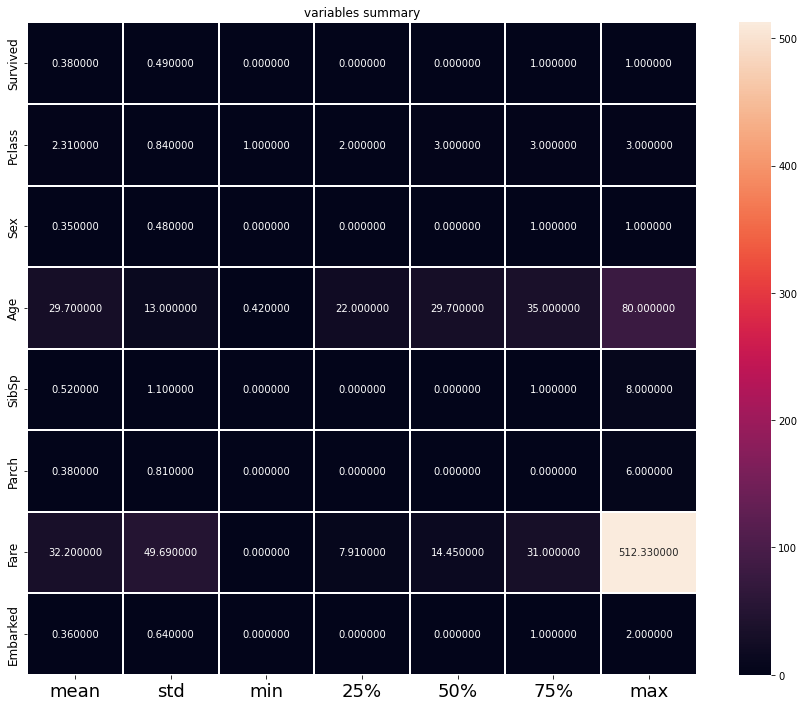

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variables summary')
plt.savefig('heatmap.png')
plt.show()

# Outcome of describe of datasets

from the above plotting we are determining mean, std,min,max value of each column. it help us further in data cleaning

total no. rows in datasets

1. 891 rows
2.  columns

# Let’s split the data into the target and feature variables.

In [72]:
df.shape

(891, 11)

Survived :
    
1. Mean=0.383838
2. std=0.486592
3. min_values=0.000000
4. max_values=1.000000

Pclass:

1. Mean=2.308642
2. std=0.836071
3. min_values=1.000000
4. max_values=3.000000

Sex:
    
1. Mean=0.352413
2. std=0.477990
3. min_values=0.000000
4. max_values=1.000000

Age: This comes under categorical data

    
1. Mean=29.699118
2. std=13.002015
3. min_values=0.420000
4. max_values=80.000000
5. 25% data = 22.00
6. 50% data = 29.70
7. 75% data = 35.0

Outcomes: This comes under binary categorical data . So describe shows no valid outcome.

SibSp:

    
1. Mean=0.523008
2. std=1.102743
3. min_values=0.000000
4. max_values=8.000000

Parch:
    
1. Mean=0.381594
2. std=0.806057
3. min_values=0.000000
4. max_values=6.000000


Fare:
    
1. Mean=32.204208
2. std=49.693429
3. min_values=0.000000
4. max_values=512.329200

Embarked:
    
1. Mean=0.361392
2. std=0.635673
3. min_values=0.000000
4. max_values=2.000000
    

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


From the above code we can have the columns datatype and memory used by the dataframe.

# Outliers checking:

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
collist = df.columns.values
ncol=30
nrows=14

In [167]:
collist

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

# skewness : 

In [168]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [161]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

columns which are having skewness

1. SibSp       3.695352
2. Parch       2.749117
3. Fare        4.787317
4. Embarked    1.543397

# Normal Distribution Curve: 

<AxesSubplot:xlabel='Survived', ylabel='Density'>

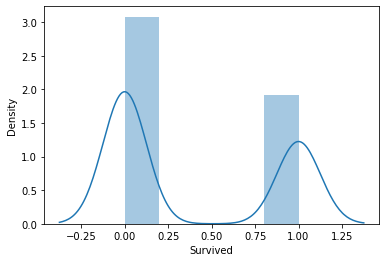

In [169]:
sns.distplot(df['Survived'])

The data of the column is not normalised . the building block is out of tne normalised curve

this plot is almost bimodel = two model (most occuring frequancy)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

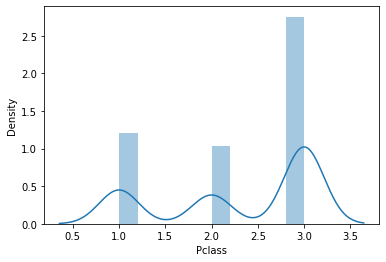

In [170]:
sns.distplot(df['Pclass'])

The data of the column is not normalised . the building block is out of tne normalised curve

<AxesSubplot:xlabel='Sex', ylabel='Density'>

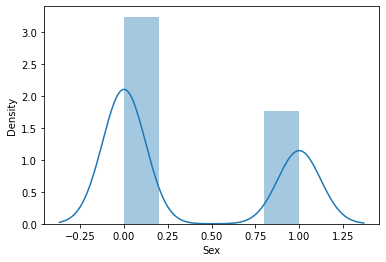

In [171]:
sns.distplot(df['Sex'])

The data of the column is not normalised . the building block is out of tne normalised curve

this plot is almost bimodel = two model (most occuring frequancy)

<AxesSubplot:xlabel='Age', ylabel='Density'>

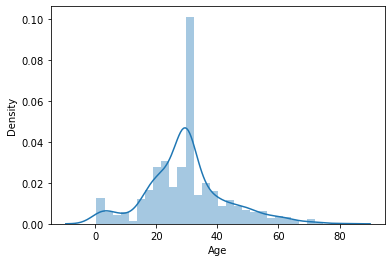

In [172]:
sns.distplot(df['Age'])

The data of the column is not normalised . the building block is out of tne normalised curve

the normal distribution curve of outcome is irrelevant

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

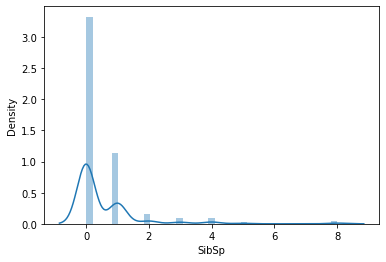

In [173]:
sns.distplot(df['SibSp'])

The data of the column is not normalised . the building block is out of tne normalised curve

<AxesSubplot:xlabel='Parch', ylabel='Density'>

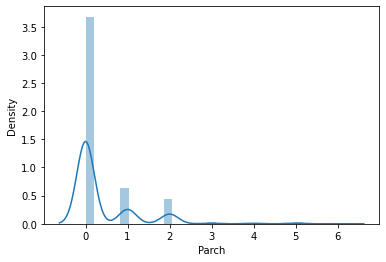

In [174]:
sns.distplot(df['Parch'])

The data of the column is not normalised . the building block is out of tne normalised curve

<AxesSubplot:xlabel='Fare', ylabel='Density'>

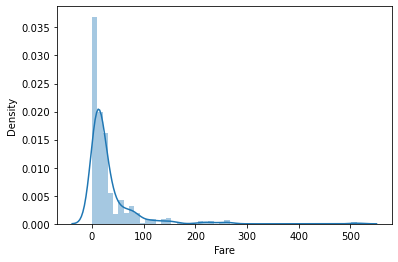

In [175]:
sns.distplot(df['Fare'])

The data of the column is not normalised . the building block is out of tne normalised curve

the normal distribution curve of outcome is irrelevant

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

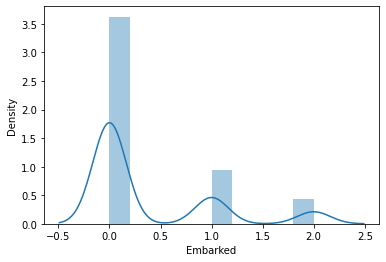

In [176]:
sns.distplot(df['Embarked'])

The data of the column is not normalised . the building block is out of tne normalised curve

# The normal distribution shows that the data is skewed.

# Data Cleaning :

In [179]:
df.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [182]:
delete= pd.DataFrame([['-0.338481','Pclass','No','Alot'],['-0.069809','Age','No','Alot']],
                    columns=['Correlation with target','column Name','Normalised','Outliers'])

In [183]:
delete

,Correlation with target,column Name,Normalised,Outliers
0,-0.338481,Pclass,No,Alot
1,-0.069809,Age,No,Alot


Ther we are setting threshold of correlaton as +/-0.1. it is not standard . the dataset is demand

In [185]:
df=df.drop(['Pclass','Age'],axis=1)

In [186]:
df

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,0,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,1,1,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,0,0,0,13.0000,0
887,1,1,0,0,30.0000,0
888,0,1,1,2,23.4500,0
889,1,0,0,0,30.0000,1


# Removing outliers:

In [188]:
from scipy.stats import zscore

In [189]:
zscore(df)

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,-0.789272,-0.737695,0.432793,-0.473674,-0.502445,-0.568837
1,1.266990,1.355574,0.432793,-0.473674,0.786845,1.005181
2,1.266990,1.355574,-0.474545,-0.473674,-0.488854,-0.568837
3,1.266990,1.355574,0.432793,-0.473674,0.420730,-0.568837
4,-0.789272,-0.737695,-0.474545,-0.473674,-0.486337,-0.568837
...,...,...,...,...,...,...
886,-0.789272,-0.737695,-0.474545,-0.473674,-0.386671,-0.568837
887,1.266990,1.355574,-0.474545,-0.473674,-0.044381,-0.568837
888,-0.789272,1.355574,0.432793,2.008933,-0.176263,-0.568837
889,1.266990,-0.737695,-0.474545,-0.473674,-0.044381,1.005181


In [190]:
import numpy as np
z=np.abs(zscore(df))

In [191]:
z.shape

(891, 6)

In [192]:
type(z)

pandas.core.frame.DataFrame

In [193]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
        164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
        324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541, 542,
        557, 567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730, 736,
        737, 742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863, 885],
       dtype=int64),
 array([3, 2, 3, 4, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2,
        2, 2, 4, 4, 2, 4, 3, 4, 4, 2, 3, 3, 4, 2, 4, 2, 2, 4, 3, 3, 3, 3,
        4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 3, 4, 2, 2, 2, 2, 2, 2, 3, 2, 3],
       dtype=int64))

In [195]:
z.iloc[25]

Survived    1.266990
Sex         1.355574
SibSp       0.432793
Parch       5.732844
Fare        0.016444
Embarked    0.568837
Name: 25, dtype: float64

In [196]:
len(np.where(z>3)[0])

65

In [197]:
df_new=df[(z<3).all(axis=1)]

In [204]:
df_new

,Survived,Sex,SibSp,Parch,Fare,Embarked
0,0,0,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,1,1,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,0,0,0,13.0000,0
887,1,1,0,0,30.0000,0
888,0,1,1,2,23.4500,0
889,1,0,0,0,30.0000,1


In [199]:
print('old dataframe',df.shape)
print('new dataframe',df_new.shape)
print('total_dropped rows',df.shape[0] - df_new.shape[0])

old dataframe (891, 6)
new dataframe (827, 6)
total_dropped rows 64


# percentage data loss:

In [200]:
loss_percentage = (891-827)/891*100

In [202]:
print(loss_percentage,'%')

7.182940516273851 %


# seprate the data

In [276]:
y=df_new.iloc[:,0]

In [277]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 827, dtype: int64

In [308]:
x = df_new.iloc[:,1:6]

In [309]:
x

,Sex,SibSp,Parch,Fare,Embarked
0,0,1,0,7.2500,0
1,1,1,0,71.2833,1
2,1,0,0,7.9250,0
3,1,1,0,53.1000,0
4,0,0,0,8.0500,0
...,...,...,...,...,...
886,0,0,0,13.0000,0
887,1,0,0,30.0000,0
888,1,1,2,23.4500,0
889,0,0,0,30.0000,1


# Transforming data to remove the skewness:

In [310]:
from sklearn.preprocessing import power_transform

In [311]:
x=power_transform(x)

In [312]:
type(x)

numpy.ndarray

In [313]:
x

array([[-0.71739251,  1.55715529, -0.48406197, -0.83781805, -0.61472402],
       [ 1.39393705,  1.55715529, -0.48406197,  1.55200293,  1.58007042],
       [ 1.39393705, -0.63163334, -0.48406197, -0.74641993, -0.61472402],
       ...,
       [ 1.39393705,  1.55715529,  2.08910176,  0.39223239, -0.61472402],
       [-0.71739251, -0.63163334, -0.48406197,  0.65182251,  1.58007042],
       [-0.71739251, -0.63163334, -0.48406197, -0.76939902,  1.7211597 ]])

In [314]:
x.ndim

2

In [317]:
x.mean()

-5.627635936189427e-17

In [320]:
round(-1.26 * 10**(-17),15)

-0.0

In [321]:
x.std()

1.0

In [323]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [347]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

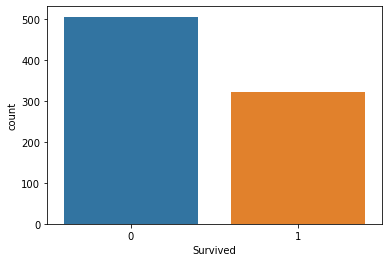

In [348]:
sns.countplot(y)

# Balance this data

In [405]:
from imblearn.over_sampling import SMOTE

In [406]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [407]:
y_train.value_counts()

0    506
1    506
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

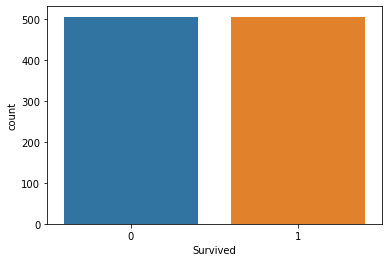

In [408]:
sns.countplot(y_train)

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)

# Logistic regression

In [428]:
lr.fit(x_train,y_train)

LogisticRegression()

In [429]:
pred_train=lr.predict(x_train)

In [430]:
pred_test=lr.predict(x_test)

In [431]:
accuracy_score(y_train,pred_train)

0.7806354009077155

In [432]:
accuracy_score(y_test,pred_test)

0.7951807228915663

In [433]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       104
           1       0.72      0.74      0.73        62

    accuracy                           0.80       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.80      0.80      0.80       166



# Cross validation score for logistic regression

In [435]:
pred_lr=lr.predict(x_test)

from sklearn.model_selection import cross_val_score

lss=accuracy_score(y_test,pred_lr)


In [437]:
lss

0.7951807228915663

In [436]:
for j in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('cross validation score is =',lsc*100)
    print('accuracy score is =',lss*100)
    print("\n")

[0.76811594 0.79227053 0.77777778 0.7961165 ]
At cv: 4
cross validation score is = 78.35701890155245
accuracy score is = 79.51807228915662


[0.76506024 0.79518072 0.77575758 0.78181818 0.79393939]
At cv: 5
cross validation score is = 78.23512230741146
accuracy score is = 79.51807228915662


[0.76811594 0.76086957 0.81884058 0.76811594 0.76086957 0.79562044]
At cv: 6
cross validation score is = 77.87386720265171
accuracy score is = 79.51807228915662


[0.77310924 0.77118644 0.80508475 0.74576271 0.80508475 0.77118644
 0.79661017]
At cv: 7
cross validation score is = 78.11463568478239
accuracy score is = 79.51807228915662


[0.77884615 0.77884615 0.80769231 0.78640777 0.77669903 0.76699029
 0.78640777 0.7961165 ]
At cv: 8
cross validation score is = 78.47507468259896
accuracy score is = 79.51807228915662


[0.7826087  0.77173913 0.76086957 0.83695652 0.7826087  0.76086957
 0.77173913 0.80434783 0.79120879]
At cv: 9
cross validation score is = 78.47719912937305
accuracy score is = 79.518

Since cross validation score accuracy are almost same. we are heading with a good approch

In [438]:
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print('The cv score is :',lsscore_selected,'\n the accuracy score is:',lss)

The cv score is : 0.7847719912937304 
 the accuracy score is: 0.7951807228915663


In [439]:
from sklearn.metrics import confusion_matrix

In [440]:
lr

LogisticRegression()

In [443]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print('accuracy of the training model:',accuracy_score(y_train,model_1_pred_train))
    print('accuracy of the test data:',accuracy_score(y_test,model_1_pred_test))
    print('classification report for test data \n',classification_report(y_test,model_1_pred_test))
    print('classification report for train data \n',classification_report(y_train,model_1_pred_train))
    print('confusion matrix: \n:',confusion_matrix(y_test,model_1_pred_test))
    
    

In [444]:
model_selection(lr,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.7806354009077155
accuracy of the test data: 0.7951807228915663
classification report for test data 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       104
           1       0.72      0.74      0.73        62

    accuracy                           0.80       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.80      0.80      0.80       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       402
           1       0.75      0.66      0.70       259

    accuracy                           0.78       661
   macro avg       0.77      0.76      0.76       661
weighted avg       0.78      0.78      0.78       661

confusion matrix: 
: [[86 18]
 [16 46]]


# DecisionTreeClassifier

In [445]:
from sklearn.tree import DecisionTreeClassifier

In [446]:
dt=DecisionTreeClassifier()

In [447]:
model_selection(dt,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.9198184568835098
accuracy of the test data: 0.7831325301204819
classification report for test data 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       104
           1       0.72      0.69      0.70        62

    accuracy                           0.78       166
   macro avg       0.77      0.77      0.77       166
weighted avg       0.78      0.78      0.78       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       402
           1       0.95      0.84      0.89       259

    accuracy                           0.92       661
   macro avg       0.93      0.91      0.91       661
weighted avg       0.92      0.92      0.92       661

confusion matrix: 
: [[87 17]
 [19 43]]


# svc

In [448]:
from sklearn.svm import SVC

In [449]:
svc=SVC()

In [450]:
model_selection(svc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.794251134644478
accuracy of the test data: 0.7831325301204819
classification report for test data 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       104
           1       0.70      0.74      0.72        62

    accuracy                           0.78       166
   macro avg       0.77      0.77      0.77       166
weighted avg       0.79      0.78      0.78       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       402
           1       0.77      0.68      0.72       259

    accuracy                           0.79       661
   macro avg       0.79      0.77      0.78       661
weighted avg       0.79      0.79      0.79       661

confusion matrix: 
: [[84 20]
 [16 46]]


# KNeighborsClassifier

In [452]:
from sklearn.neighbors import KNeighborsClassifier

In [453]:
knc = KNeighborsClassifier()

In [454]:
model_selection(knc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.8320726172465961
accuracy of the test data: 0.8012048192771084
classification report for test data 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       104
           1       0.70      0.81      0.75        62

    accuracy                           0.80       166
   macro avg       0.79      0.80      0.79       166
weighted avg       0.81      0.80      0.80       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       402
           1       0.79      0.78      0.78       259

    accuracy                           0.83       661
   macro avg       0.82      0.82      0.82       661
weighted avg       0.83      0.83      0.83       661

confusion matrix: 
: [[83 21]
 [12 50]]


# RandomForestClassifier

In [455]:
from sklearn.ensemble import RandomForestClassifier

In [457]:
rfc=RandomForestClassifier()

In [458]:
model_selection(rfc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.9198184568835098
accuracy of the test data: 0.7891566265060241
classification report for test data 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       104
           1       0.71      0.74      0.72        62

    accuracy                           0.79       166
   macro avg       0.77      0.78      0.78       166
weighted avg       0.79      0.79      0.79       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       402
           1       0.93      0.86      0.89       259

    accuracy                           0.92       661
   macro avg       0.92      0.91      0.91       661
weighted avg       0.92      0.92      0.92       661

confusion matrix: 
: [[85 19]
 [16 46]]


# SGDClassifier

In [459]:
from sklearn.linear_model import SGDClassifier

In [460]:
sgdc=SGDClassifier()

In [461]:
model_selection(sgdc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.6520423600605144
accuracy of the test data: 0.6927710843373494
classification report for test data 
               precision    recall  f1-score   support

           0       0.69      0.91      0.79       104
           1       0.69      0.32      0.44        62

    accuracy                           0.69       166
   macro avg       0.69      0.62      0.61       166
weighted avg       0.69      0.69      0.66       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       402
           1       0.64      0.26      0.37       259

    accuracy                           0.65       661
   macro avg       0.65      0.58      0.56       661
weighted avg       0.65      0.65      0.61       661

confusion matrix: 
: [[95  9]
 [42 20]]


# AdaBoostClassifier

In [462]:
from sklearn.ensemble import AdaBoostClassifier

In [463]:
adac = AdaBoostClassifier()

In [464]:
model_selection(adac,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.7972768532526475
accuracy of the test data: 0.7891566265060241
classification report for test data 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       104
           1       0.71      0.74      0.72        62

    accuracy                           0.79       166
   macro avg       0.77      0.78      0.78       166
weighted avg       0.79      0.79      0.79       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       402
           1       0.76      0.70      0.73       259

    accuracy                           0.80       661
   macro avg       0.79      0.78      0.78       661
weighted avg       0.80      0.80      0.80       661

confusion matrix: 
: [[85 19]
 [16 46]]


# GradientBoostingClassifier

In [465]:
from sklearn.ensemble import GradientBoostingClassifier

In [466]:
gbc=GradientBoostingClassifier()

In [467]:
model_selection(gbc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.8789712556732224
accuracy of the test data: 0.7951807228915663
classification report for test data 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       104
           1       0.72      0.74      0.73        62

    accuracy                           0.80       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.80      0.80      0.80       166

classification report for train data 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       402
           1       0.87      0.81      0.84       259

    accuracy                           0.88       661
   macro avg       0.88      0.87      0.87       661
weighted avg       0.88      0.88      0.88       661

confusion matrix: 
: [[86 18]
 [16 46]]


# The model with outliers:

# AUC ROC CURVE:

In [468]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc


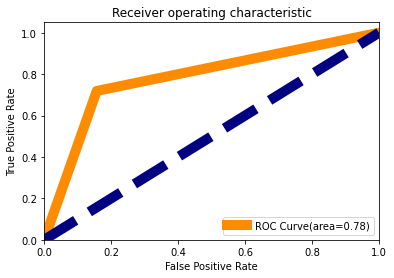

In [470]:
fpr,tpr,threshold = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1], [0,1], color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# since the model without outliers performing well  we will select that dataframe

# model seving

In [472]:
import pickle

In [474]:
filename='Titanic Project.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [475]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(test_x))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))

In [476]:
df_com

,original,predicted
0,0,1
1,1,0
2,1,0
3,0,0
4,1,1
...,...,...
161,0,0
162,0,0
163,0,0
164,0,1
